## Introduction

Kickstarter is a funding platform directed toward helping creative projects get off the ground. It's entirely driven by crowdfunding, so donations from the general public fuel these dynamic new ideas.

How does Kickstarter work?

Kickstarter is driven by creators and backers. Creators present creative project ideas, and backers fund them. Creators set up a page to display their project's details and prototypes using text, video, and photos. Project creators choose a deadline and a minimum funding goal and create reward levels for backers who pledge specific amounts. 
Once enough backers have funded the project, the creator can develop and produce their vision. If the goal is not met by the deadline, no funds are collected (all or nothing rule).

### About this project 

Purpose of this project is to try to make a model to predict if the project would be successful or failure.

Some interesting questions to answer along the analysis:
- How many backers are needed on average to have successful Kickstarter campaign?
- Are projects from certain countries more likely to be successful campaigns?
- Which categories of projects are more likely to attract more backers? 

### Dataset information 
- Source: https://www.kaggle.com/kemical/kickstarter-projects

- Content: dataset contains about 380,000 rows of data collected on crowdfunding projects hosted on Kickstarter.com. Columns are self explanatory.

- Acknowledgements: Kickstarter Platform

## Reading csv file into pandas dataframe and overview of the data

In [70]:
import pandas as pd

data=pd.read_csv('ks-projects-201801.csv')
data.head(5)

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [71]:
data.shape

(378661, 15)

Let's investigate columns and data types of these columns.

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Data cleaning

In [73]:
data['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

Project's state labeled other than 'failed' or 'successful' will be droped. As 'state' column is our target variable, we want only project labeled as 'failed' or 'successful'. 

We could also separate projects labeled with 'live' and try to predict their outcome.

In [74]:
data=data[data['state'].isin(['failed', 'successful'])]

In [75]:
data['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

Next, checking for null values in dataframe.

In [76]:
data.isnull().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

There are 3 null values in 'name' column. We will just drop three rows containing this values. Also, column 'usd_pledged' contains 210 null values. Considering our dataframe consists of aproximately 380,000 rows it won't affect our data much if we drop these 210 rows also.

In [77]:
data=data.dropna()

In [78]:
data.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Our dataframe doesn't have null values anymore.

## Data exploration and feature engineering

In this section we will do some exploratory data analysis on features. We will also create new features where neccesary. 

At the end of this section we will have clean data and will be ready to prepare prediction models.

### Target variable - 'state'

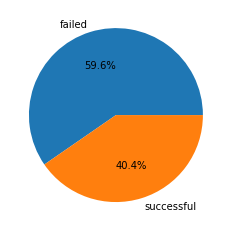

In [79]:
# Show pie chart of 'successful' and 'failed' projects to see percentages
import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(x=data['state'].value_counts(), labels=data['state'].value_counts().index, autopct='%1.1f%%')
plt.show()

As we can see from the pie chart above, almost 60% of projects fail to reach their goal. If 'canceled' and 'suspended' project would be added to 'failed' group of projects, the percentage would be even higher.

Next, we will make new feature which will have 1's for 'successful' projects and 0's for 'failed' projects. We have to do this because 'state' column is categorical variable

In [80]:
#Create dummy variables from 'state' column
data=pd.get_dummies(data, columns=['state'])
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'state_failed',
       'state_successful'],
      dtype='object')

We can drop 'state_failed' columns because all the data we need is contained in 'state_successful' column. 

Also, we will rename 'state_successful' column to 'successful'.

In [81]:
#drop 'state_failed' columns
data=data.drop(labels='state_failed', axis=1)
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'state_successful'],
      dtype='object')

In [82]:
#rename 'state_successful' to 'successful' and 'usd pledged' to 'usd_pledged'  
success_rename={'usd pledged':'usd_pledged','state_successful':'successful'}
data.rename(mapper=success_rename, axis=1, inplace=True)
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd_pledged',
       'usd_pledged_real', 'usd_goal_real', 'successful'],
      dtype='object')

Our target variable is now named 'successful'.

### 'category' and 'main category' features

In [83]:
unique_categories=data['category'].unique()
len(unique_categories)

159

In [84]:
data['main_category'].value_counts()

Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: main_category, dtype: int64

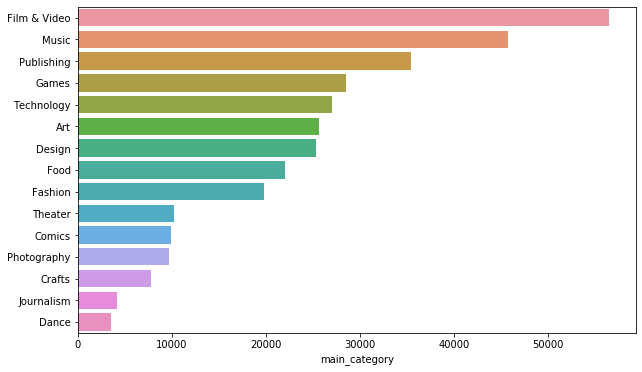

In [85]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=data['main_category'].value_counts(), y=data['main_category'].value_counts().index)

It would be interesting to see percentages of successful projects by main categories.

In [86]:
# value counts of main categories as dataframe
all_grouped=data['main_category'].value_counts().reset_index()

all_grouped=all_grouped.sort_values('index')

# rename column to 'total'
rename_category={'main_category':'total'}

all_grouped.rename(mapper=rename_category, axis=1, inplace=True)

In [87]:
# only successful projects grouped by categories (returned as dataframe)

only_success=data['main_category'][data['successful']==1].value_counts().reset_index()

# sort by categories
rename_success={'main_category':'successful'}
only_success=only_success.sort_values('index').rename(mapper=rename_success, axis=1)

In [88]:
# merge all_grouped and only_success dataframes
projects_success_rate=all_grouped.merge(only_success, on='index')

In [89]:
# add new column which shows success ratio of projects by categories
projects_success_rate['success_ratio']=projects_success_rate['successful']/projects_success_rate['total']

projects_success_rate.sort_values('success_ratio', ascending=False)

index  total  successful  success_ratio
3          Dance   3573        2338       0.654352
14       Theater  10242        6534       0.637961
1         Comics   9878        5842       0.591415
10         Music  45801       24105       0.526299
0            Art  25640       11510       0.448908
8          Games  28520       12518       0.438920
6   Film & Video  56503       23612       0.417889
4         Design  25363       10549       0.415921
12    Publishing  35413       12300       0.347330
11   Photography   9689        3305       0.341108
5        Fashion  19774        5593       0.282846
7           Food  22054        6085       0.275914
2         Crafts   7818        2115       0.270530
9     Journalism   4148        1012       0.243973
13    Technology  27046        6433       0.237854

It looks like best chances of project being successful and being funded have projects in dance, theater, comics and music categories. Notice that all this categories have one thing in common, they all could fall under one big umbrella called 'entertainment'.

Least chances of project being funded have projects in technology and journalism.

### 'country' and 'currency' features

In [90]:
countries=data['country'].value_counts()
countries

US    261358
GB     29453
CA     12370
AU      6616
DE      3436
FR      2520
NL      2411
IT      2369
ES      1873
SE      1509
MX      1411
NZ      1274
DK       926
IE       683
CH       652
NO       582
BE       523
AT       485
HK       477
SG       454
LU        57
JP        23
Name: country, dtype: int64

As expected, the most projects are located in the US, in fact, US has more projects than rest of the countries combined. Let's see what is success rate of projects by different countries.

In [91]:
crosst = pd.crosstab(data['country'],data['successful'])
crosst['success ratio'] = crosst[1]/crosst.sum(axis=1)
crosst.sort_values(by=['success ratio'],inplace=True,ascending=False)
crosst

successful       0       1  success ratio
country                                  
HK             261     216       0.452830
US          152059  109299       0.418196
GB           17386   12067       0.409704
SG             276     178       0.392070
DK             566     360       0.388769
FR            1612     908       0.360317
NZ             826     448       0.351648
SE            1000     509       0.337309
CA            8236    4134       0.334196
LU              38      19       0.333333
JP              16       7       0.304348
AU            4606    2010       0.303809
IE             476     207       0.303075
BE             371     152       0.290631
CH             465     187       0.286810
MX            1015     396       0.280652
NO             420     162       0.278351
DE            2499     937       0.272701
ES            1381     492       0.262680
NL            1794     617       0.255910
AT             378     107       0.220619
IT            1930     439       0.185310

It look like projects from US have good chances of being successful. Top 5 countries by success ratio are HK (Hong Kong), US (United States), GB (Great Britan), SG (Singapore) and DK (Denmark).

Let's see if 'currency' column relates to 'country' column (value counts should return approximately equal counts).

In [92]:
currencies=data['currency'].value_counts()

currencies

USD    261358
GBP     29453
EUR     14357
CAD     12370
AUD      6616
SEK      1509
MXN      1411
NZD      1274
DKK       926
CHF       652
NOK       582
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

We can see there are less currencies than countries in our dataframe. We can conclude that some countries are using same currency. This is the case with euro countries which are using their common currency EUR.

### 'backers' feature

In [93]:
data['backers'].describe()

count    331462.000000
mean        116.456315
std         965.732911
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2318cdd8488>,
 'caps': [<matplotlib.lines.Line2D at 0x2318cde9ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2318cde0d08>],
 'medians': [<matplotlib.lines.Line2D at 0x2318cdefcc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2318cdefdc8>],
 'means': []}

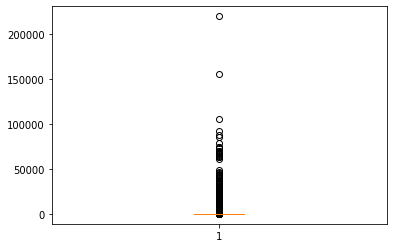

In [94]:
#visualize outliers with boxplot
plt.boxplot(data['backers'])

We will set our upper threshold and drop all values that are gretaer than that threshold (drop outliers).

In [95]:
#set max_threshold
max_threshold=data['backers'].quantile(0.9995)
max_threshold

12647.290499999595

In [96]:
#how many outliers do we have (values greater than max_threshold)
outliers=data[data.backers>max_threshold]
outliers.shape

(166, 15)

In [97]:
#remove outliers from dataset
data=data[data.backers<max_threshold]

#recalculate summary statistics
data['backers'].describe()

count    331296.000000
mean        102.062929
std         432.965752
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max       12626.000000
Name: backers, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2318ce37748>,
 'caps': [<matplotlib.lines.Line2D at 0x2318ce48b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2318ce48288>],
 'medians': [<matplotlib.lines.Line2D at 0x2318ce4ec88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2318ce4ed48>],
 'means': []}

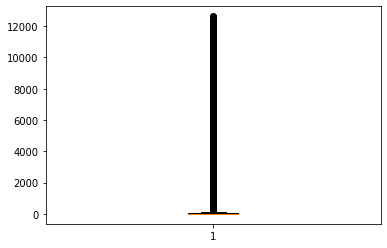

In [98]:
#boxplot after removing outliers
plt.boxplot(data['backers'])

### 'launched' and 'deadline' features

In [99]:
# inspect 'launched' column 
data['launched'].head(5)

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
5    2016-02-26 13:38:27
Name: launched, dtype: object

Data type object of 'launched' column is object which means our column isn't being recognized as a date. We will strip hours, minutes and seconds and convert data with pd.to_datetime() so it could be recognized as a date.

In [100]:
# strip hours, minutes and seconds
data['launched']=data['launched'].str[:10]

# convert 'launched' to datetime
data['launched'] = pd.to_datetime(data['launched'], format = '%Y-%m-%d')

In [101]:
data['launched'].sample(5)

366715   2016-07-26
130618   2010-03-03
138947   2013-09-28
320239   2013-01-29
4701     2015-12-03
Name: launched, dtype: datetime64[ns]

In [102]:
# inspect 'deadline' column
data['deadline'].head(5)

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
5    2016-04-01
Name: deadline, dtype: object

In [103]:
# convert 'deadline' to datetime
data['deadline'] = pd.to_datetime(data['deadline'], format = '%Y-%m-%d')

In [104]:
data['deadline'].head()

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
5   2016-04-01
Name: deadline, dtype: datetime64[ns]

Now we have both 'launched' and 'deadline' in the right format. We can create new column called 'campaign_duration' which will be showing how many days campaign was active. It will be interesting to see if project which are active for longer period of time have better chances of being funded in compariosn with shorter projects.

In [105]:
# create new column 'campaign_duration' (in days)
data['campaign_duration']=(data['deadline']-data['launched']).apply(lambda x: x.days)

data['campaign_duration'].sample(10)

326713     7
309249    33
72457     33
187842    30
183162    30
366855    30
37454     30
304722    30
89894     30
167409    25
Name: campaign_duration, dtype: int64

In [106]:
# summary statistics for 'campaign_duration' column
data['campaign_duration'].describe()

count    331296.000000
mean         33.955870
std          12.715659
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: campaign_duration, dtype: float64

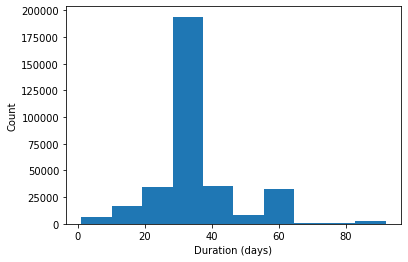

In [107]:
# histogram to observe 'campaign_duration' distribution
plt.hist(data['campaign_duration'])
plt.xlabel('Duration (days)')
plt.ylabel('Count')
plt.show()

"Projects on Kickstarter can last anywhere from 1 - 60 days. We've done some research, and found that projects lasting any longer are rarely successful. 

We recommend setting your campaign at 30 days or less. Campaigns with shorter durations have higher success rates, and create a helpful sense of urgency around your project."  - Kickstarter Support

We will not remove project over 60 day because maybe in some point of time in the past there was possible to campaign project for more than 60 days. Let's check how many data would we lose if we decided to remove project over 60 days.

In [108]:
data[data.campaign_duration>60].shape[0]

4824

### money features

Money features: 'goal','usd_goal_real', 'pledged', 'usd_pledged_real' and 'usd_pledged' 

Explanations of columns:
- usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter)

- usd_pledged_real: conversion in US dollars of the pledged column (conversion from Fixer.io API)

- usd_goal_real: conversion in US dollars of the goal column (conversion from Fixer.io API)

In [109]:
money_cols=['currency','goal', 'usd_goal_real', 'pledged', 'usd_pledged', 'usd_pledged_real']

data[money_cols].describe()

goal  usd_goal_real       pledged   usd_pledged  \
count  3.312960e+05   3.312960e+05  3.312960e+05  3.312960e+05   
mean   4.413240e+04   4.138356e+04  9.360904e+03  6.754318e+03   
std    1.118489e+06   1.109492e+06  5.984349e+04  4.110835e+04   
min    1.000000e-02   1.000000e-02  0.000000e+00  0.000000e+00   
25%    2.000000e+03   2.000000e+03  5.000000e+01  2.500000e+01   
50%    5.000000e+03   5.000000e+03  7.800000e+02  5.010000e+02   
75%    1.500000e+04   1.500000e+04  4.643497e+03  3.413000e+03   
max    1.000000e+08   1.663614e+08  1.003530e+07  3.656618e+06   

       usd_pledged_real  
count      3.312960e+05  
mean       8.705996e+03  
std        5.014222e+04  
min        0.000000e+00  
25%        5.000000e+01  
50%        7.853750e+02  
75%        4.599000e+03  
max        4.236618e+06

We will not consider 'goal' and 'pledged' column. We want to use data converted in US dollars. Therefore, for our analysis we will use columns 'usd_goal_real' (goal converted to US dollars, if currency is USD goal=usd_goal_real) and 'usd_pledged_real' (total amount pledged converted to US dollars).

In [110]:
# max threshold for 'usd_goal_real'
max_threshold_goal=data['usd_goal_real'].quantile(0.98)
max_threshold_goal

150000.0

In [111]:
# remove outliers from 'usd_goal_real'
data=data[data['usd_goal_real']<max_threshold_goal]

In [112]:
data['usd_goal_real'].describe()

count    323889.00000
mean      12680.20154
std       19689.47255
min           0.01000
25%        2000.00000
50%        5000.00000
75%       15000.00000
max      149995.00000
Name: usd_goal_real, dtype: float64

In [113]:
# max threshold for 'usd_pledged_real'
max_threshold_pledged=data['usd_pledged_real'].quantile(0.995)
max_threshold_pledged

195001.042

(array([242028.,  42938.,  15307.,  10485.,   3679.,   3492.,   3866.,
           740.,    955.,    399.]),
 array([1.00000000e-02, 1.49995090e+04, 2.99990080e+04, 4.49985070e+04,
        5.99980060e+04, 7.49975050e+04, 8.99970040e+04, 1.04996503e+05,
        1.19996002e+05, 1.34995501e+05, 1.49995000e+05]),
 <a list of 10 Patch objects>)

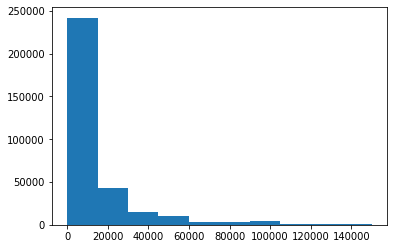

In [114]:
# plot histogram to see distribution 
plt.hist(data['usd_goal_real'])

In [115]:
#remove outliers from 'usd_pledged_real' and calculate summary statistics
data=data[data['usd_pledged_real']<max_threshold_pledged]

data['usd_pledged_real'].describe()

count    322269.000000
mean       5874.447540
std       15889.474518
min           0.000000
25%          50.000000
50%         799.000000
75%        4508.000000
max      194998.550000
Name: usd_pledged_real, dtype: float64

(array([2.98636e+05, 1.32800e+04, 4.49900e+03, 2.04900e+03, 1.23900e+03,
        9.63000e+02, 5.89000e+02, 4.55000e+02, 3.21000e+02, 2.38000e+02]),
 array([     0.   ,  19499.855,  38999.71 ,  58499.565,  77999.42 ,
         97499.275, 116999.13 , 136498.985, 155998.84 , 175498.695,
        194998.55 ]),
 <a list of 10 Patch objects>)

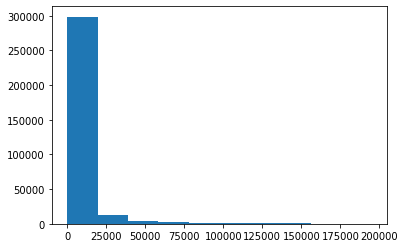

In [116]:
# plot histogram to see distribution
plt.hist(data['usd_pledged_real'])

### Correlations

We need to check correlations to avoid multicollinearity of our features.

In [117]:

data.corr()

ID      goal   pledged   backers  usd_pledged  \
ID                 1.000000  0.001266 -0.001450 -0.000936    -0.002180   
goal               0.001266  1.000000  0.305537  0.066566     0.120837   
pledged           -0.001450  0.305537  1.000000  0.544648     0.604381   
backers           -0.000936  0.066566  0.544648  1.000000     0.684710   
usd_pledged       -0.002180  0.120837  0.604381  0.684710     1.000000   
usd_pledged_real   0.000084  0.136886  0.724180  0.759490     0.886461   
usd_goal_real      0.001582  0.535581  0.186758  0.135815     0.257113   
successful        -0.000904 -0.110315  0.260334  0.310682     0.330542   
campaign_duration  0.002622  0.067415  0.004291 -0.014754     0.010272   

                   usd_pledged_real  usd_goal_real  successful  \
ID                         0.000084       0.001582   -0.000904   
goal                       0.136886       0.535581   -0.110315   
pledged                    0.724180       0.186758    0.260334   
backers                    0.759490       0.135815    0.310682   
usd_pledged                0.886461       0.257113    0.330542   
usd_pledged_real           1.000000       0.270211    0.360059   
usd_goal_real              0.270211       1.000000   -0.195167   
successful                 0.360059      -0.195167    1.000000   
campaign_duration          0.005644       0.117358   -0.112544   

                   campaign_duration  
ID                          0.002622  
goal                        0.067415  
pledged                     0.004291  
backers                    -0.014754  
usd_pledged                 0.010272  
usd_pledged_real            0.005644  
usd_goal_real               0.117358  
successful                 -0.112544  
campaign_duration           1.000000

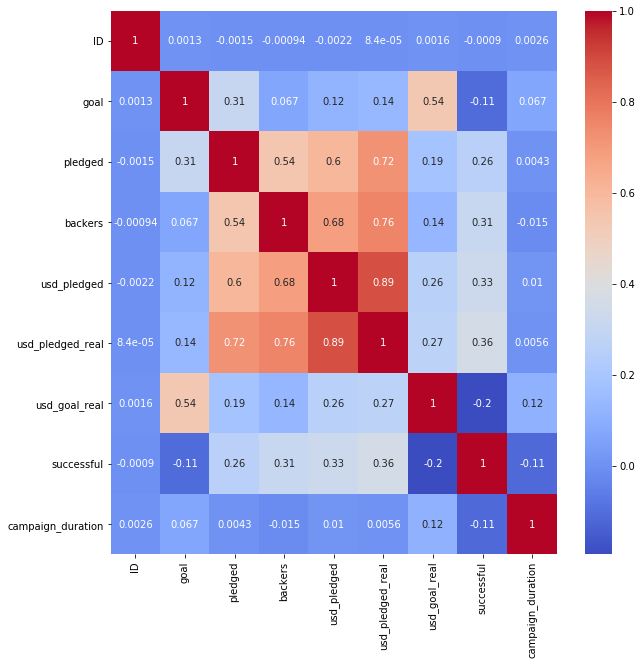

In [118]:
# visualizing correlations 
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

It looks like everything is OK, we don't have multicollinearity (actually we have, 'usd_pledged_real' and 'usd_pledged' are highly positively correlated, but we already decided earlier that we will predict with 'usd_pledged_real' and 'usd_pledged' will be dropped).

Let's drop excess columns and prepare our dataframe for model building.

In [119]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd_pledged',
       'usd_pledged_real', 'usd_goal_real', 'successful', 'campaign_duration'],
      dtype='object')

In [120]:
# drop excess columns
drop_cols=['ID', 'name', 'category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'usd_pledged']

data=data.drop(drop_cols, axis=1)

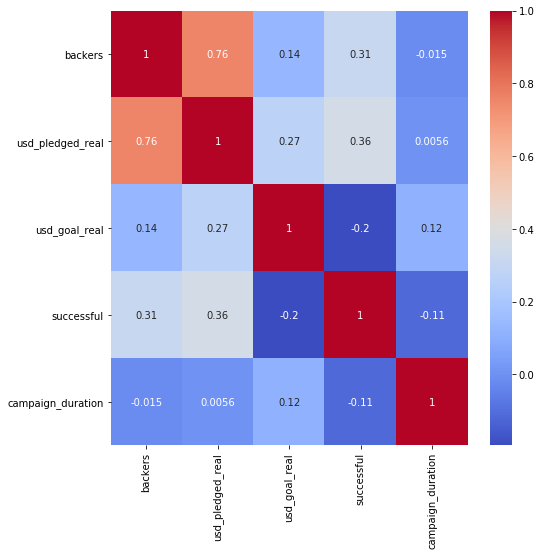

In [121]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

### Converting categorical variables into dummies

We need to transform categorical variables 'main_category' and 'country' into dummy variables.

In [122]:
# country dummies
country_dummies=pd.get_dummies(data['country'], drop_first=True)
country_dummies

AU  BE  CA  CH  DE  DK  ES  FR  GB  HK  ...  IT  JP  LU  MX  NL  NO  \
0        0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
5        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
378654   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
378657   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
378658   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
378659   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
378660   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

        NZ  SE  SG  US  
0        0   0   0   0  
1        0   0   0   1  
2        0   0   0   1  
3        0   0   0   1  
5        0   0   0   1  
...     ..  ..  ..  ..  
378654   0   0   0   1  
378657   0   0   0   1  
378658   0   0   0   1  
378659   0   0   0   1  
378660   0   0   0   1  

[322269 rows x 21 columns]

In [123]:
# category dummies
category_dummies=pd.get_dummies(data['main_category']).drop('Journalism', axis=1)
category_dummies

Art  Comics  Crafts  Dance  Design  Fashion  Film & Video  Food  \
0         0       0       0      0       0        0             0     0   
1         0       0       0      0       0        0             1     0   
2         0       0       0      0       0        0             1     0   
3         0       0       0      0       0        0             0     0   
5         0       0       0      0       0        0             0     1   
...     ...     ...     ...    ...     ...      ...           ...   ...   
378654    0       0       0      0       0        0             0     1   
378657    0       0       0      0       0        0             1     0   
378658    0       0       0      0       0        0             1     0   
378659    0       0       0      0       0        0             0     0   
378660    1       0       0      0       0        0             0     0   

        Games  Music  Photography  Publishing  Technology  Theater  
0           0      0            0           1           0        0  
1           0      0            0           0           0        0  
2           0      0            0           0           0        0  
3           0      1            0           0           0        0  
5           0      0            0           0           0        0  
...       ...    ...          ...         ...         ...      ...  
378654      0      0            0           0           0        0  
378657      0      0            0           0           0        0  
378658      0      0            0           0           0        0  
378659      0      0            0           0           1        0  
378660      0      0            0           0           0        0  

[322269 rows x 14 columns]

In [124]:
# merge to original dataframe and drop 'main_category' and 'country'
data=data.drop(['main_category', 'country'], axis=1)

In [125]:
merged=pd.concat([data, category_dummies, country_dummies], axis=1)
merged.head()

backers  usd_pledged_real  usd_goal_real  successful  campaign_duration  \
0        0               0.0        1533.95           0                 59   
1       15            2421.0       30000.00           0                 60   
2        3             220.0       45000.00           0                 45   
3        1               1.0        5000.00           0                 30   
5      224           52375.0       50000.00           1                 35   

   Art  Comics  Crafts  Dance  Design  ...  IT  JP  LU  MX  NL  NO  NZ  SE  \
0    0       0       0      0       0  ...   0   0   0   0   0   0   0   0   
1    0       0       0      0       0  ...   0   0   0   0   0   0   0   0   
2    0       0       0      0       0  ...   0   0   0   0   0   0   0   0   
3    0       0       0      0       0  ...   0   0   0   0   0   0   0   0   
5    0       0       0      0       0  ...   0   0   0   0   0   0   0   0   

   SG  US  
0   0   0  
1   0   1  
2   0   1  
3   0   1  
5   0   1  

[5 rows x 40 columns]

In [126]:
data_clean=merged.copy()

In [127]:
data_clean.shape

(322269, 40)

### Scaling the data

In [128]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler=MinMaxScaler()

In [129]:
data_scaled_array=scaler.fit_transform(data_clean)

In [130]:
data_scaled=pd.DataFrame(data_scaled_array, columns=data_clean.columns)
data_scaled.head()

backers  usd_pledged_real  usd_goal_real  successful  campaign_duration  \
0  0.000000          0.000000       0.010227         0.0           0.637363   
1  0.001277          0.012415       0.200007         0.0           0.648352   
2  0.000255          0.001128       0.300010         0.0           0.483516   
3  0.000085          0.000005       0.033334         0.0           0.318681   
4  0.019065          0.268592       0.333344         1.0           0.373626   

   Art  Comics  Crafts  Dance  Design  ...   IT   JP   LU   MX   NL   NO   NZ  \
0  0.0     0.0     0.0    0.0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0     0.0     0.0    0.0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0     0.0     0.0    0.0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0     0.0     0.0    0.0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0     0.0     0.0    0.0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    SE   SG   US  
0  0.0  0.0  0.0  
1  0.0  0.0  1.0  
2  0.0  0.0  1.0  
3  0.0  0.0  1.0  
4  0.0  0.0  1.0  

[5 rows x 40 columns]

### Building predictive models

#### Selection of an error metric

Scikit-learn has a handy function we can use to calculate accuracy: metrics.accuracy_score(). The function accepts two parameters, the actual values and our predicted values, and returns our accuracy score.

To give us a better understanding of the real performance of our model, we can use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores. The most common form of cross validation, and the one we will be using, is called k-fold cross validation. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds.

In [131]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#### Train test split

We will split our data into train set and test set. Ratio will be 80:20.

In [132]:
# splitting the data
from sklearn.model_selection import train_test_split

X=data_scaled.drop('successful', axis=1)
y=data_scaled['successful']

train_X, test_X, train_y, test_y=train_test_split(X, y, train_size=0.8, random_state=1)

#### K Neighbors classifier model

In [133]:
# import KNeighborsClassifier and make an instance 
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()

In [134]:
# fitting the model
knc.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [135]:
# predicting values on test set
predictions_knc=knc.predict(test_X)

##### K Neighbors classifier accuracy

In [136]:
# calculating accuracy with accuracy_score()
accuracy_knc=accuracy_score(test_y, predictions_knc)
accuracy_knc

0.9708939708939709

In [137]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_knc=cross_val_score(knc, X, y, cv=10)
accuracy_cross_val_knc

array([0.973004  , 0.97232135, 0.96986998, 0.97374872, 0.97086294,
       0.97241444, 0.97263164, 0.97225929, 0.97272473, 0.97235152])

In [138]:
#calculating cross_val_score mean
accuracy_cross_val_knc=np.mean(accuracy_cross_val_knc)
accuracy_cross_val_knc

0.9722188610528979

#### Logistic Regression model

In [139]:
# import LogisticRegression and make an instance 
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)

In [140]:
# fitting the model
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
# predicting values on test set
predictions_lr=lr.predict(test_X)

##### Logistic Regression accuracy

In [142]:
# calculating accuracy with accuracy_score()
accuracy_lr=accuracy_score(test_y, predictions_lr)
accuracy_lr

0.959149160641698

In [143]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_lr=cross_val_score(lr, X, y, cv=10)
accuracy_cross_val_lr

array([0.96139883, 0.96003351, 0.95904056, 0.96121265, 0.95941291,
       0.96118162, 0.96124368, 0.96205045, 0.96205045, 0.96139763])

In [145]:
#calculating cross_val_score mean
accuracy_cross_val_lr=np.mean(accuracy_cross_val_lr)
accuracy_cross_val_lr

0.9609022291793504

#### Random Forests model

In [146]:
# import RandomForestClassifier and make an instance 
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=5, random_state=1, min_samples_leaf=2)

In [147]:
# fitting the model
rfc.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [148]:
# predicting values on test set
predictions_rfc=rfc.predict(test_X)

##### Random Forests accuracy

In [149]:
# calculating accuracy with accuracy_score()
accuracy_rfc=accuracy_score(test_y, predictions_rfc)
accuracy_rfc

0.9894963850187731

In [150]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_rfc=cross_val_score(rfc, X, y, cv=10)
accuracy_cross_val_rfc

array([0.98811556, 0.98997735, 0.99180811, 0.98913954, 0.98895336,
       0.99003941, 0.98985323, 0.9898222 , 0.99093927, 0.9891392 ])

In [151]:
#calculating cross_val_score mean
accuracy_cross_val_rfc=np.mean(accuracy_cross_val_rfc)
accuracy_cross_val_rfc

0.9897787232420157

### Artificial neural networks model

In [152]:
# import MLPClassifier and make an instance 
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu')

In [153]:
# fitting the model
mlpc.fit(train_X, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [154]:
# predicting values on test set
predictions_mlpc=mlpc.predict(test_X)

##### Artificial neural networks accuracy

In [155]:
# calculating accuracy with accuracy_score()
accuracy_mlpc=accuracy_score(test_y, predictions_mlpc)
accuracy_mlpc

0.9965867130046234

In [156]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_mlpc=cross_val_score(mlpc, X, y, cv=10)
accuracy_cross_val_mlpc

array([0.99224253, 0.99624538, 0.99413535, 0.99599715, 0.99640053,
       0.9939802 , 0.99705216, 0.99550067, 0.99658671, 0.99559362])

In [157]:
#calculating cross_val_score mean
accuracy_cross_val_mlpc=np.mean(accuracy_cross_val_mlpc)
accuracy_cross_val_mlpc

0.995373430954231

#### Result comparison

| MODEL | ACCURACY SCORE | CROSS VALIDATION SCORE |
| ----- | -------------- | ---------------------- |
| K Nearest neighbors, k=5 | 97,10% | 97,22% | 
| Logistic regression | 95,91% | 96,10% |
| Random Forests | 98,95% | 98,98% |
| Artificial Neural Networks | 99,66% | 99,54% |